## Project No 1 - Visualizations

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/jackiekazil/data-wrangling/master/data/chp3/data-text.csv')
df.head(2)

In [6]:
df.rename(columns={'PUBLISH STATES':'Publish Status','WHO region':'WHO Region'},inplace=True)
df.head(2)

,Indicator,Publish Status,Year,WHO Region,World Bank income group,Country,Sex,Display Value,Numeric,Low,High,Comments
0,Life expectancy at birth (years),Published,1990,Europe,High-income,Andorra,Both sexes,77,77.0,NaN,NaN,NaN
1,Life expectancy at birth (years),Published,2000,Europe,High-income,Andorra,Both sexes,80,80.0,NaN,NaN,NaN


#### Before delving into the dataset lets have a look at the Indicator

In [10]:
df.shape

(4656, 12)

In [17]:
df.columns

Index(['Indicator', 'Publish Status', 'Year', 'WHO Region',
       'World Bank income group', 'Country', 'Sex', 'Display Value', 'Numeric',
       'Low', 'High', 'Comments'],
      dtype='object')

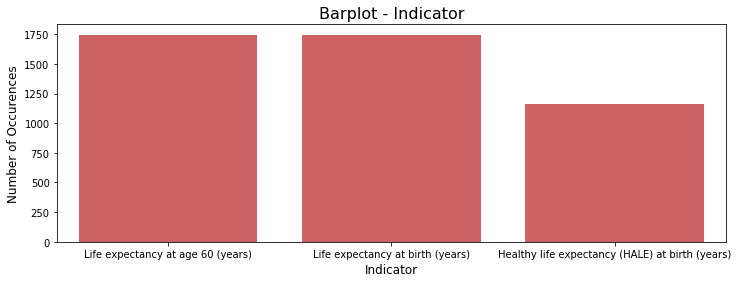

In [40]:
# Graph 1
ind = df.Indicator.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=ind.index, y=ind.values, alpha=0.8, color=color[3])
plt.ylabel('Number of Occurences',fontsize=12)
plt.xlabel('Indicator',fontsize=12)
plt.title('Barplot - Indicator',fontsize =16)
plt.show()

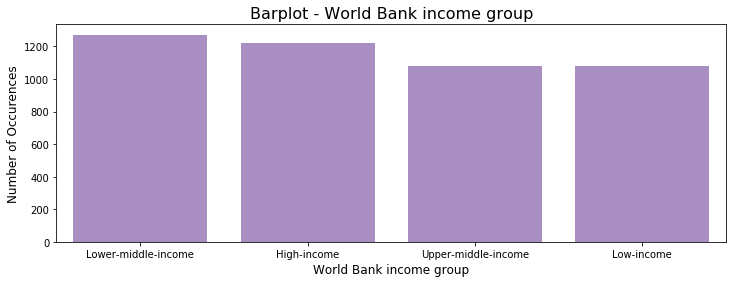

In [18]:
ind = df['World Bank income group'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(ind.index, ind.values, alpha=0.8, color=color[4])
plt.ylabel('Number of Occurences',fontsize=12)
plt.xlabel('World Bank income group',fontsize=12)
plt.title('Barplot - World Bank income group',fontsize =16)
plt.show()

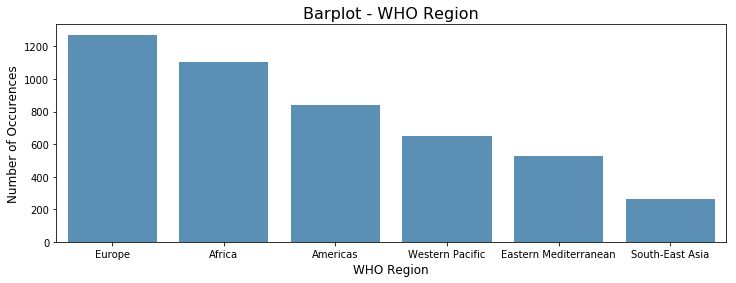

In [20]:
ind = df['WHO Region'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(ind.index, ind.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurences',fontsize=12)
plt.xlabel('WHO Region',fontsize=12)
plt.title('Barplot - WHO Region',fontsize =16)
plt.show()

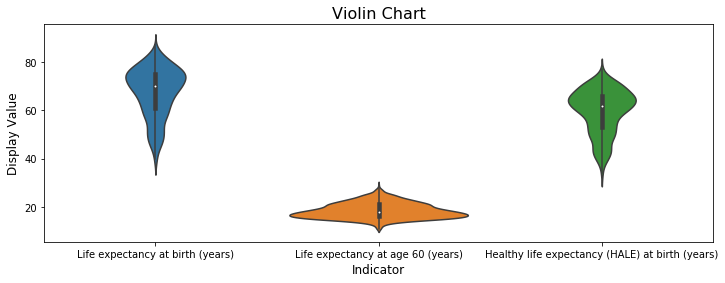

In [23]:
# df['Display Value'].ix[df['Display Value']>20]
plt.figure(figsize=(12,4))
sns.violinplot(x='Indicator', y='Display Value', data=df)
plt.ylabel('Display Value', fontsize=12)
plt.xlabel('Indicator',fontsize=12)
plt.title('Violin Chart', fontsize=16)
plt.show()

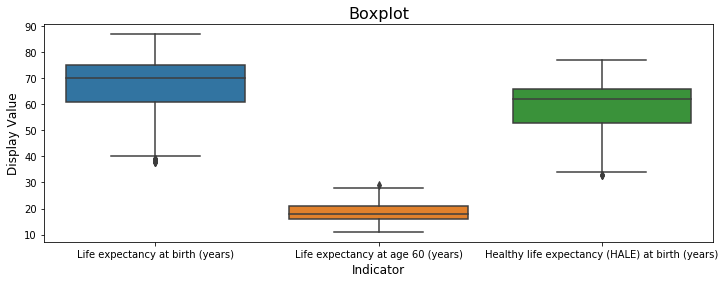

In [26]:
plt.figure(figsize=(12,4))
sns.boxplot(x='Indicator', y='Display Value', data=df)
plt.ylabel('Display Value', fontsize=12)
plt.xlabel('Indicator',fontsize=12)
plt.title('Boxplot', fontsize=16)
plt.show()

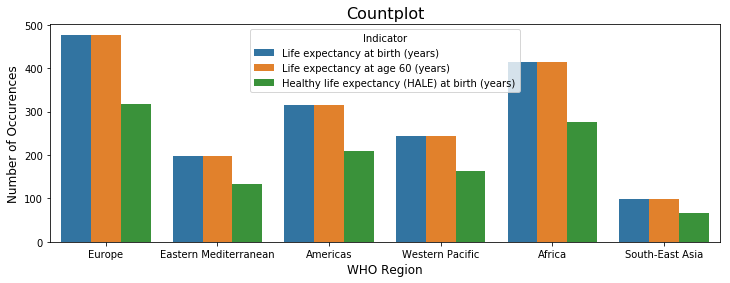

In [36]:
plt.figure(figsize=(12,4))
sns.countplot(x='WHO Region', hue='Indicator', data=df)
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('WHO Region',fontsize=12)
plt.title('Countplot', fontsize=16)
plt.show()

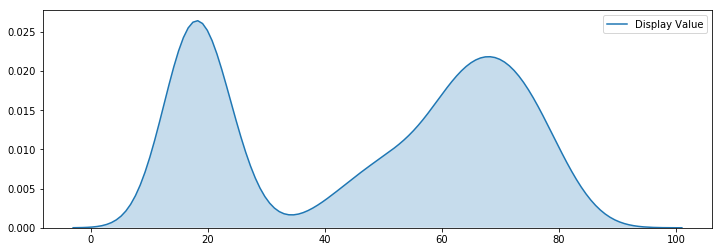

In [42]:
plt.figure(figsize=(12,4))
sns.kdeplot(df['Display Value'],shade=True)
plt.show()

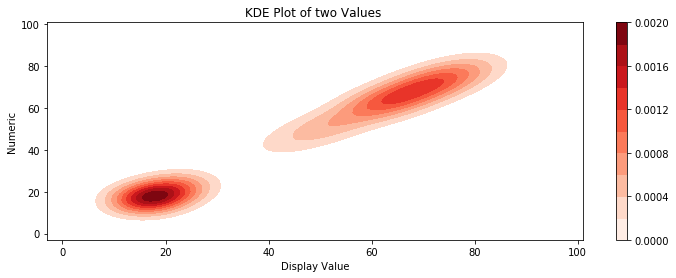

In [44]:
plt.figure(figsize=(12,4))
sns.kdeplot(df['Display Value'],df['Numeric'],shade=True,shade_lowest=False, cbar=True, cmap='Reds')
plt.title('KDE Plot of two Values ')
plt.show()

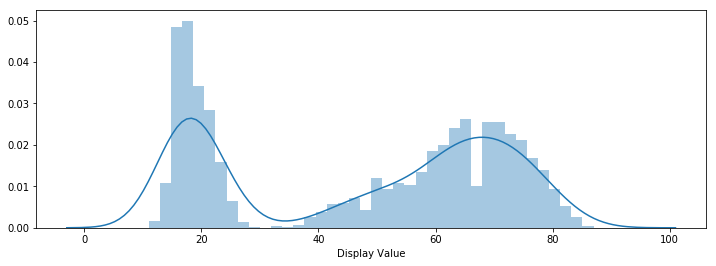

In [51]:
plt.figure(figsize=(12,4))
sns.distplot(df['Display Value'],bins=40,kde=True)
plt.show()

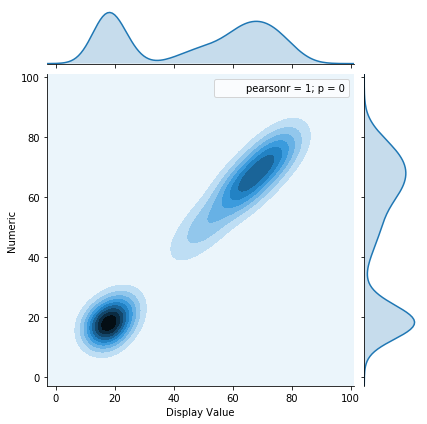

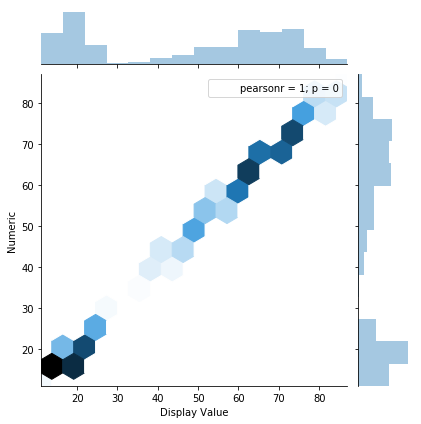

In [82]:
plt.figure(figsize=(12,4))
# fig,ax = plt.subplots(1,2,figsize=(12,4))
sns.jointplot(df['Display Value'],df.Numeric, kind='kde')
# plt.subplot(1,2,2)
sns.jointplot('Display Value', 'Numeric', data=df, kind='hex')
plt.show()

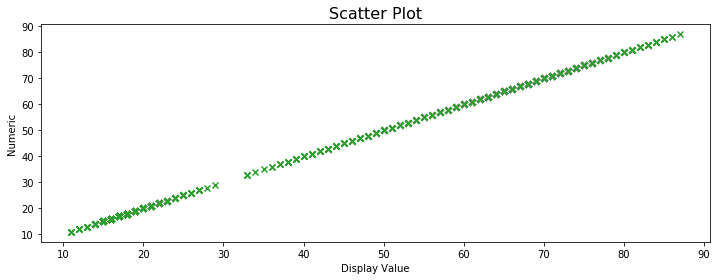

In [81]:
plt.figure(figsize=(12,4))
plt.scatter(df['Display Value'], df.Numeric, marker='x',color=color[2])
plt.ylabel('Numeric')
plt.xlabel('Display Value')
plt.title('Scatter Plot', fontsize=16)
plt.show()

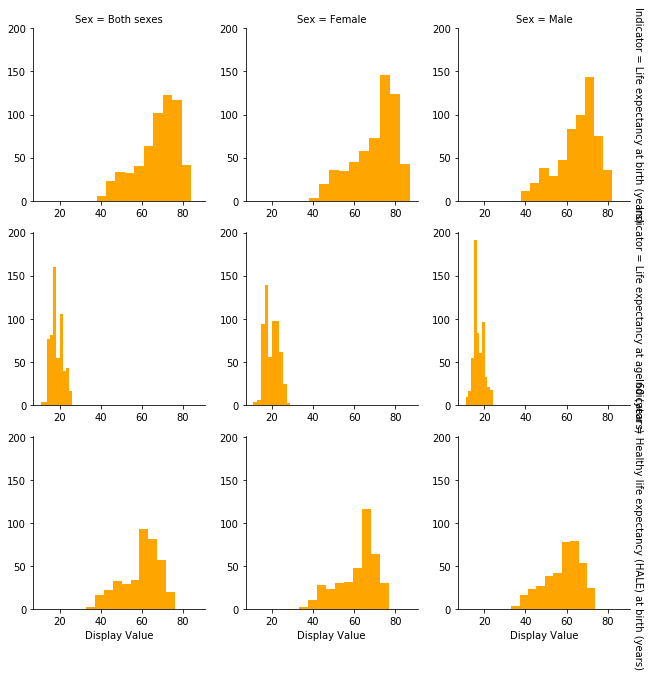

In [84]:
g = sns.FacetGrid(df, row='Indicator', col='Sex', margin_titles=True)
g.map(plt.hist, 'Display Value',color='orange', lw=0 )
plt.show()

C:\Users\hiremamr\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


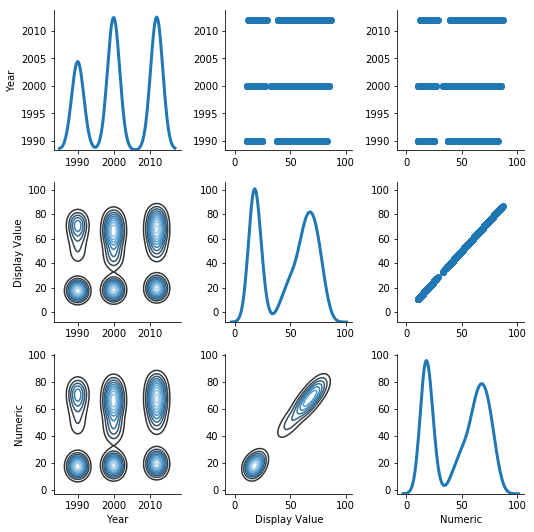

In [90]:
df1 = df[['Year','Display Value','Numeric']]
g = sns.PairGrid(df1, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.show()